# Homework Two

The work for homework two.

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from whatif import Model
from whatif import get_sim_results_df

In [3]:
%matplotlib inline

# Work

This is where work gets done.

## 1a - 1b

In [4]:
# Created an OO-model
class BusinessModel():
    def __init__(self, fixed_cost, var_cost, selling_price, spf_constant, spf_linear, spf_quadratic):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
    
    # Created 2nd order polynomial function
    def demand(self, selling_price):
        return self.spf_constant + self.spf_linear * selling_price + self.spf_quadratic * selling_price ** 2
    # Created revenue, cost, and profit functions using the 2nd order polynomial function
    def revenue(self, selling_price):
        return self.demand(selling_price) * selling_price

    def cost(self, selling_price):
        return self.fixed_cost + self.var_cost * self.demand(selling_price)

    def profit(self, selling_price):
        return self.revenue(selling_price) - self.cost(selling_price)
    # Developed data tables for profit vs demands
    def data_table(self, selling_prices):
        profits = []
        demands = []
        for price in selling_prices:
            profit = self.profit(price)
            demand = self.demand(price)
            profits.append(profit)
            demands.append(demand)
        return profits, demands
    # Plotted data table
    def plot_data_table(self, selling_prices, profits):
        plt.plot(selling_prices, profits, marker='o')
        plt.xlabel('Selling Price')
        plt.ylabel('Profit')
        plt.title('Relationship between Selling Price and Profit')
        plt.grid(True)
        plt.show()
        
    def break_even_price(self, min_price, max_price):
        def target_func(price):
            return self.profit(price)

        break_even_price = Model.goal_seek(self, target_func, 0, 'selling_price', min_price, max_price)
        return break_even_price

Selling Price | Profit
----------------------
$80           | -54680.00
$90           | -27360.00
$100          | -5000.00
$110          | 12760.00
$120          | 26280.00
$130          | 35920.00
$140          | 42040.00


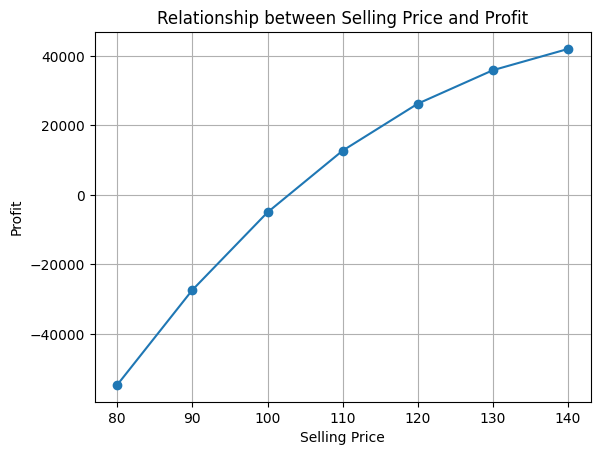

In [5]:
# Create the model object
model = BusinessModel(fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06)

# Generate data table
selling_prices = np.arange(80, 150, 10)
profits, demands = model.data_table(selling_prices)

# Print the data table
print("Selling Price | Profit")
print("----------------------")
for price, profit in zip(selling_prices, profits):
    print(f"${price:<12} | {profit:<.2f}")
# Plot the data table
model.plot_data_table(selling_prices, profits)

## 1c

In [6]:
# Find the break-even selling price
break_even_price = model.break_even_price(80, 140)

print("Break-even Selling Price:", break_even_price)

TypeError: attribute name must be string, not 'function'

## 1d 

In [ ]:
# Create the model object
model = BusinessModel(fixed_cost=5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06)

# Define the ranges for selling price and variable production cost
selling_prices = np.arange(80, 150, 10)
variable_costs = np.arange(85, 115, 5)

# Generate the data table
profits = model.data_table(selling_prices, variable_costs)

# Plot the data table
model.plot_data_table(selling_prices, variable_costs, profits)